In [26]:
import pandas as pd

df =pd.read_csv("./b2w.csv")

df.head()


,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [27]:
df_limpo = df[['review_text', 'polarity']]

df_limpo=  df_limpo.dropna()

In [28]:
df_limpo.polarity.value_counts()

1.0    80300
0.0    35758
Name: polarity, dtype: int64

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def treinar_modelo(dados, coluna_texto, coluna_sentimento):
    vetorizar = CountVectorizer(max_features=500)
    bag = vetorizar.fit_transform(df_limpo[coluna_texto])

    X_train, X_test, y_train, y_test = train_test_split(bag, df_limpo[coluna_sentimento], test_size=0.2, random_state=42, stratify=df_limpo[coluna_sentimento] )

    model =LogisticRegression()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    return acc
   

In [30]:
treinar_modelo(df_limpo, "review_text", "polarity")

/Users/rodrigovidal/Documents/faculdade/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9254695846975702

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def word_cloud(dados, coluna_texto):
    linhas = " ".join([texto for texto in dados[coluna_texto]])
    nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(linhas)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.axis("off")
    plt.show()


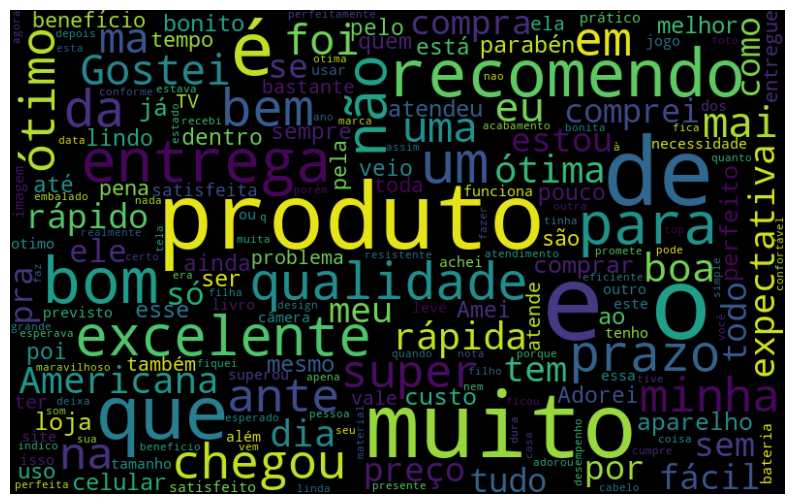

In [50]:
word_cloud(df_limpo.query("polarity==1"), "review_text")

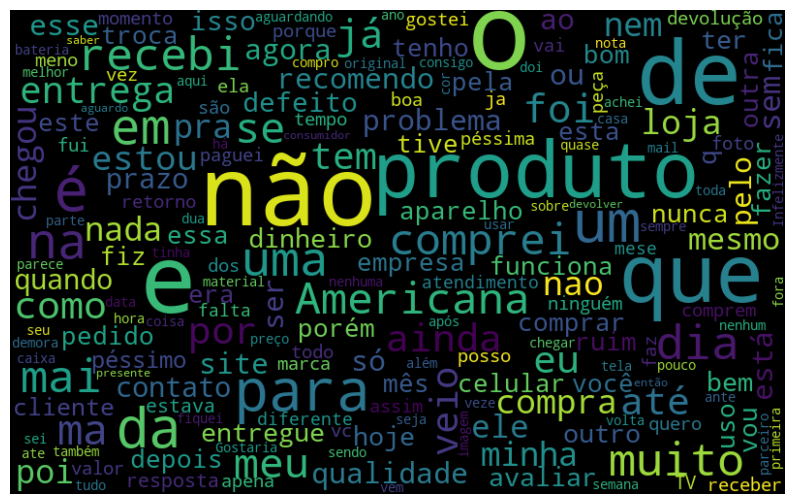

In [51]:
word_cloud(df_limpo.query("polarity==0"), "review_text")


In [52]:
import nltk

corpus = ["Muito bom este produto","Muito ruim este produto"]
freq = nltk.FreqDist(corpus)

freq


FreqDist({'Muito bom este produto': 1, 'Muito ruim este produto': 1})

In [55]:
from nltk import tokenize
token_por_espaco = tokenize.WhitespaceTokenizer()

token_frase = token_por_espaco.tokenize(corpus[0])
token_frase

['Muito', 'bom', 'este', 'produto']

In [56]:
palavras = " ".join([texto for texto in df_limpo["review_text"]])
token_dataset =token_por_espaco.tokenize(palavras)
fq = nltk.FreqDist(token_dataset)    

fq

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [58]:
df_fq = pd.DataFrame({"Palavra": list(fq.keys()), "Frequencia":list(fq.values())})
df_fq.nlargest(columns="Frequencia", n = 10)

,Palavra,Frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


In [59]:
stp = nltk.corpus.stopwords.words("portuguese")
stp

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou